# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
dataframe_list = []
files = glob.glob('states*.csv')
for dataframes in files:
    data = pd.read_csv(dataframes)
    dataframe_list.append(data)

In [3]:
df = pd.concat(dataframe_list).reset_index()
#reset_index to reset the entire index of the new master dataframe
df.head()
df=df[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Income', 'GenderPop']]
df

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,"$67,264.78",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,"$64,657.80",2648667M_2630239F
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,"$64,657.80",2648667M_2630239F
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,"$76,146.56",1751607M_1841615F
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,"$61,827.98",448413M_478041F
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,"$75,466.36",306674M_340810F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Income     60 non-null     object
 8   GenderPop  60 non-null     object
dtypes: int64(1), object(8)
memory usage: 4.3+ KB


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [5]:
print(df.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Income', 'GenderPop'],
      dtype='object')


In [6]:
df.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Income       object
GenderPop    object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [7]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,"$67,264.78",19087135M_19334329F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [8]:
df['Income']= df.Income.str.replace('[\$]', '', regex=True)
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,"43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,"70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,"54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,"41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,"67,264.78",19087135M_19334329F


In [9]:
df['Income']= df.Income.str.replace('[\,]', '', regex=True)
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,43296.36,2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,70354.74,384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,41935.63,1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,67264.78,19087135M_19334329F


In [10]:
df['Income']= pd.to_numeric(df['Income'])
df['Income'].dtypes

dtype('float64')

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [11]:
gender_split= df['GenderPop'].str.split('_')
gender_split
df['Men'] = gender_split.str.get(0)
df['Women']= gender_split.str.get(1)
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,43296.36,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,70354.74,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,54207.82,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,41935.63,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,67264.78,19087135M_19334329F,19087135M,19334329F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [12]:
df['Men']= df.Men.str.replace('[M]', '', regex=True)
df['Women']= df.Women.str.replace('[F]', '', regex=True)
df

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,43296.36,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,70354.74,384160M_349215F,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,54207.82,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,41935.63,1451913M_1506295F,1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,67264.78,19087135M_19334329F,19087135,19334329
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,64657.80,2648667M_2630239F,2648667,2630239
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,64657.80,2648667M_2630239F,2648667,2630239
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,76146.56,1751607M_1841615F,1751607,1841615
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,61827.98,448413M_478041F,448413,478041
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,75466.36,306674M_340810F,306674,340810


In [13]:
df['Men'] = pd.to_numeric(df['Men'])
df['Women'] = pd.to_numeric(df['Women'])
df.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

Don't forget to remove the column GenderPop

In [14]:
df= df[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Income', 'Men', 'Women']]
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,43296.36,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,70354.74,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,41935.63,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,67264.78,19087135,19334329.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

2   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

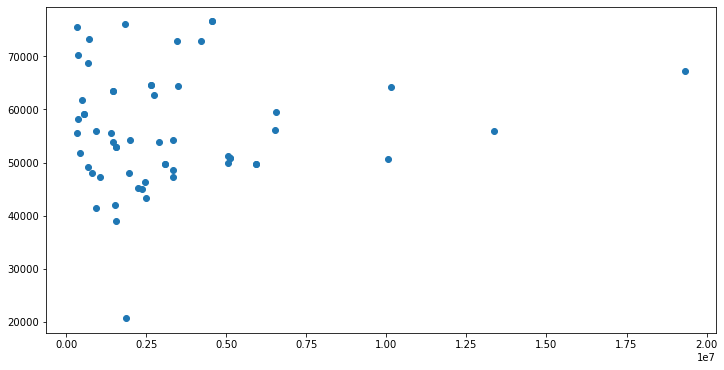

In [15]:
plt.figure(figsize= (12,6))
plt.scatter(df['Women'], df['Income'])
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [16]:
df.isnull().sum()

State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Income      0
Men         0
Women       3
dtype: int64

In [17]:
df['Women'] = df.Women.fillna(df['TotalPop'] - df['Men'])
df.isnull().sum()

C:\Users\oluwo\AppData\Local\Temp/ipykernel_23616/4041578510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Women'] = df.Women.fillna(df['TotalPop'] - df['Men'])


State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Income      0
Men         0
Women       0
dtype: int64

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [18]:
df.duplicated().sum()

9

11. Drop those duplicates using the `.drop_duplicates()` function.

In [19]:
df= df.drop_duplicates()
df.duplicated().sum()

0

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

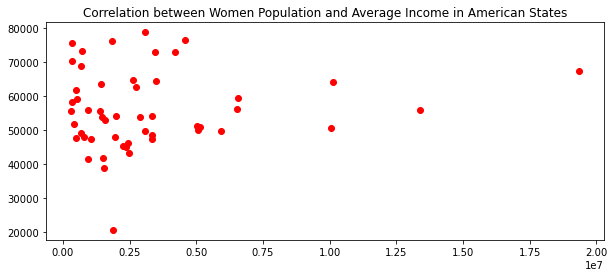

In [20]:
plt.figure(figsize= (10,4))
plt.scatter(df['Women'], df['Income'],color= 'red')
plt.title('Correlation between Women Population and Average Income in American States')
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [21]:
df.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Income', 'Men', 'Women'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [22]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,43296.36,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,70354.74,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,41935.63,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,67264.78,19087135,19334329.0


In [23]:
#for columns in df:
remove_p = lambda x: x.replace('%', '')

In [24]:
people= ['Hispanic','White','Black','Native','Asian']
for columns in people:
    df[columns] = df[columns].apply(remove_p)
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Income,Men,Women
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,43296.36,2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,41935.63,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,67264.78,19087135,19334329.0


In [25]:
for columns in people:
    df[columns]= pd.to_numeric(df[columns])
df.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Income      float64
Men           int64
Women       float64
dtype: object

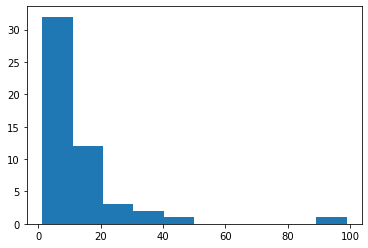

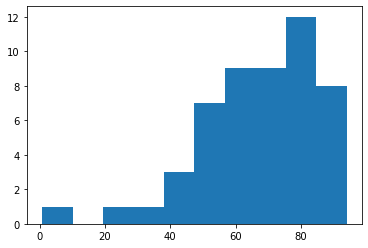

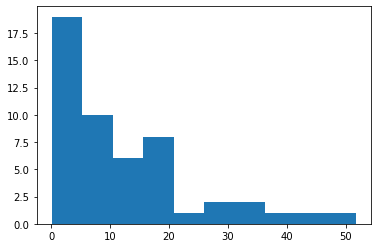

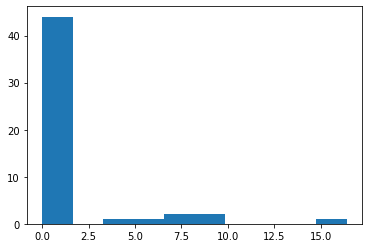

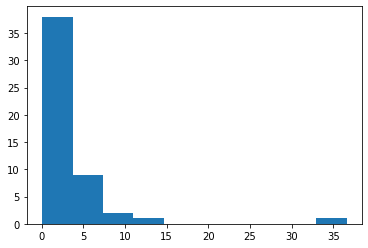

In [26]:
for columns in people:
    plt.hist(df[columns])
    plt.show()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.